# MM20B007 DAL Assignment 3

## The key task is to determine whether a person makes over $50K a year.

In [311]:
# Necessary Packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import table
import category_encoders as ce

from sklearn.feature_selection import VarianceThreshold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler


path = '/content/drive/MyDrive/sem 7/EE5708/Assignment 3/adult.xlsx'

In [312]:
# Data

data = pd.read_excel(path)
df = data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2   77516           32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4   13              32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10  2174            32560 non-null  int64 
 11  0               32560 non-null  int64 
 12  40              32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [313]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'Occupation', 'relationship', 'race', 'sex', 'capital-gain',
              'capital-loss', 'hours-per-week', 'native-country', 'income']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<ipython-input-314-40074864e6d8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

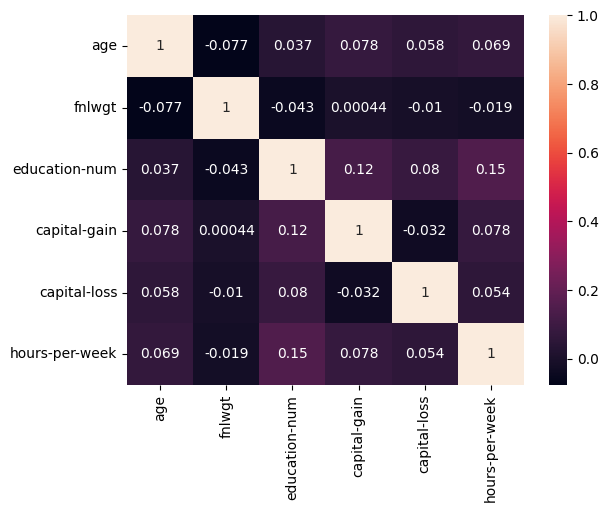

In [314]:
plt.plot(figsize = (10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True, xticklabels = True, yticklabels = True)

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [316]:
unique_classes = []
for cols in list(df.columns):
  if str(df[cols].dtypes) == 'object':
    unique_classes.append(df[cols].unique())

unique_classes

[array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
        ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
        ' Never-worked'], dtype=object),
 array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
        ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
        ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
        ' Preschool', ' 12th'], dtype=object),
 array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
        ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
       dtype=object),
 array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
        ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
        ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
        ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
        ' Priv-house-serv'], dtype=object),
 array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
        ' Other-

In [317]:
cols_with_missing_values = ['workclass', 'Occupation', 'native-country']
for items in cols_with_missing_values:
  print(df[items].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64
 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                    

1. We see there is a value '?' in some of the features, these features are 'workclass', 'Occupation', and 'native-country'.

'workclass' has 1836 '?' values. \
'Occupation' has 1843 '?' values. \
'native-country' has 583 '?' values.

2. Rest of the features have unique features without any discrepancy.

Text(0.5, 0, 'Workclass')

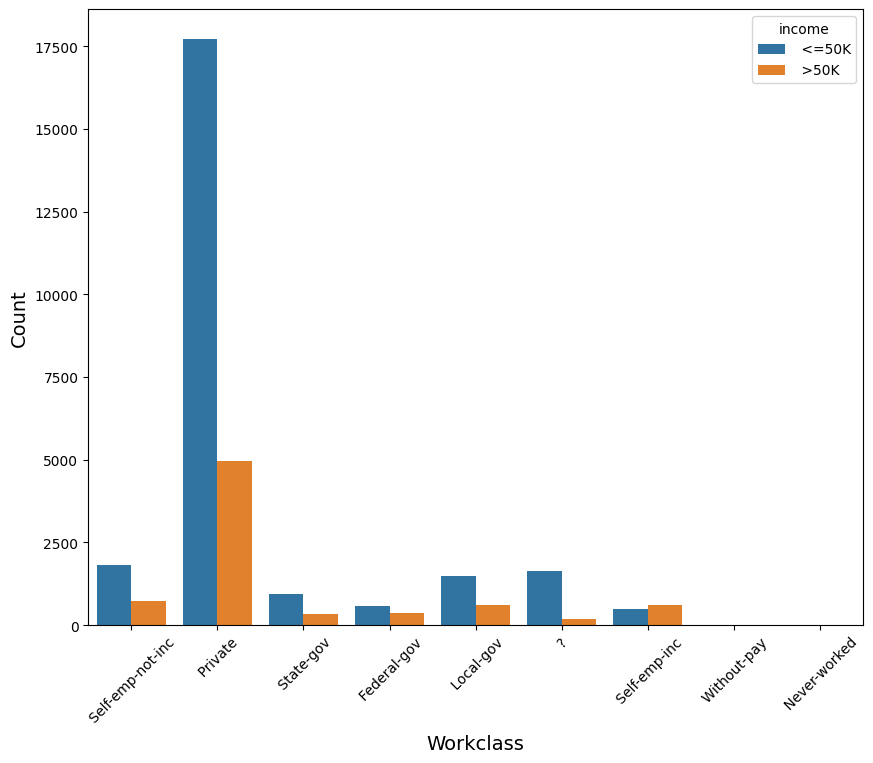

In [318]:
f, ax = plt.subplots(1, 1, figsize = (10, 8))
sns.countplot(x = 'workclass', data = df, hue = 'income', ax = ax)
plt.xticks(rotation = 45)
plt.ylabel('Count', fontsize = 14)
plt.xlabel('Workclass', fontsize = 14)

Text(0.5, 0, 'Occupation')

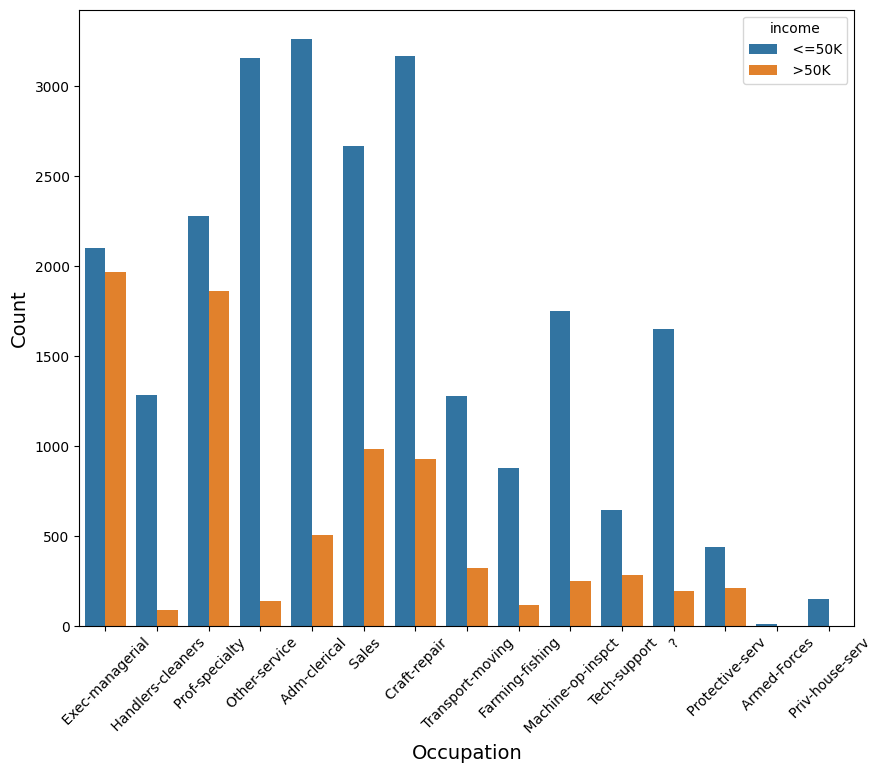

In [319]:
f, ax = plt.subplots(1, 1, figsize = (10, 8))
sns.countplot(x = 'Occupation', data = df, hue = 'income', ax = ax)
plt.xticks(rotation = 45)
plt.ylabel('Count', fontsize = 14)
plt.xlabel('Occupation', fontsize = 14)

Text(0.5, 0, 'Native country')

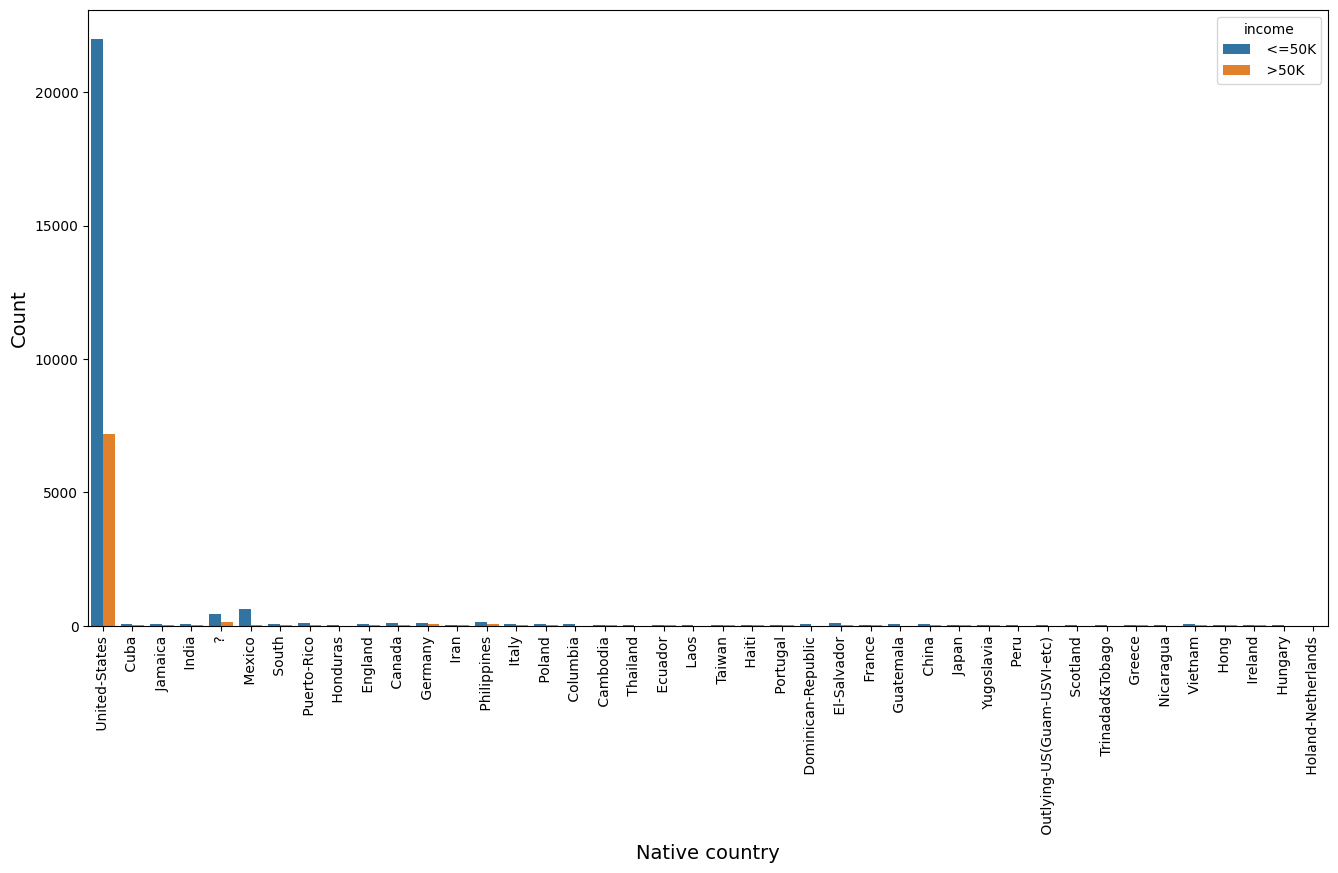

In [320]:
f, ax = plt.subplots(1, 1, figsize = (16, 8))
sns.countplot(x = 'native-country', data = df, hue = 'income', ax = ax)
plt.xticks(rotation = 90)
plt.ylabel('Count', fontsize = 14)
plt.xlabel('Native country', fontsize = 14)

In [321]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,Occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Taking care of '?' value.


### Workclass

In [322]:
print('\n')
print('******************************************************************************************************************************************************************')
workclass_before_resampling = df['workclass'].value_counts().to_dict()
workclass_before_resampling



******************************************************************************************************************************************************************


{' Private': 22696,
 ' Self-emp-not-inc': 2541,
 ' Local-gov': 2093,
 ' ?': 1836,
 ' State-gov': 1297,
 ' Self-emp-inc': 1116,
 ' Federal-gov': 960,
 ' Without-pay': 14,
 ' Never-worked': 7}

<ipython-input-323-347ac2e3a97d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_workspace_ffill['workclass'].replace(' ?', np.NaN, inplace = True)
<ipython-input-323-347ac2e3a97d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_workspace_ffill['workclass'].fillna(method = 'ffill', inplace = True)




******************************************************************************************************************************************************************


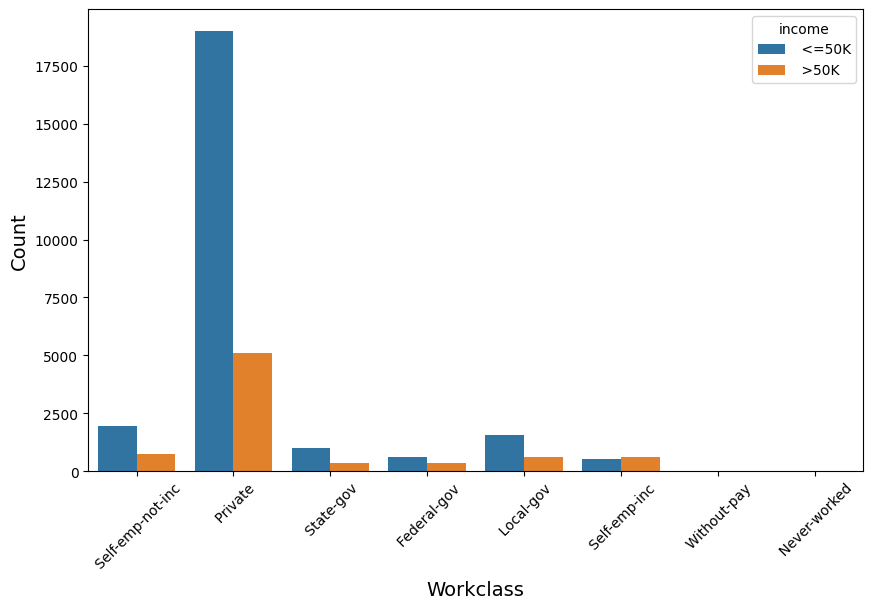

In [323]:
df_workspace_ffill = df[['workclass', 'income']]
df_workspace_ffill['workclass'].replace(' ?', np.NaN, inplace = True)
df_workspace_ffill['workclass'].fillna(method = 'ffill', inplace = True)
df_workspace_ffill['workclass'].value_counts()

plt.figure(figsize = (10, 6))
ax = sns.countplot(x = 'workclass', data = df_workspace_ffill, hue = 'income')
plt.xticks(rotation=45)
plt.ylabel('Count', fontsize = 14)
plt.xlabel('Workclass', fontsize = 14)

print('\n')
print('******************************************************************************************************************************************************************')
after_ffill_workclass = df_workspace_ffill['workclass'].value_counts().to_dict()

<ipython-input-324-eec52a7cad13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_workspace_bfill['workclass'].replace(' ?', np.NaN, inplace = True)
<ipython-input-324-eec52a7cad13>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_workspace_bfill['workclass'].fillna(method = 'bfill', inplace = True)




******************************************************************************************************************************************************************


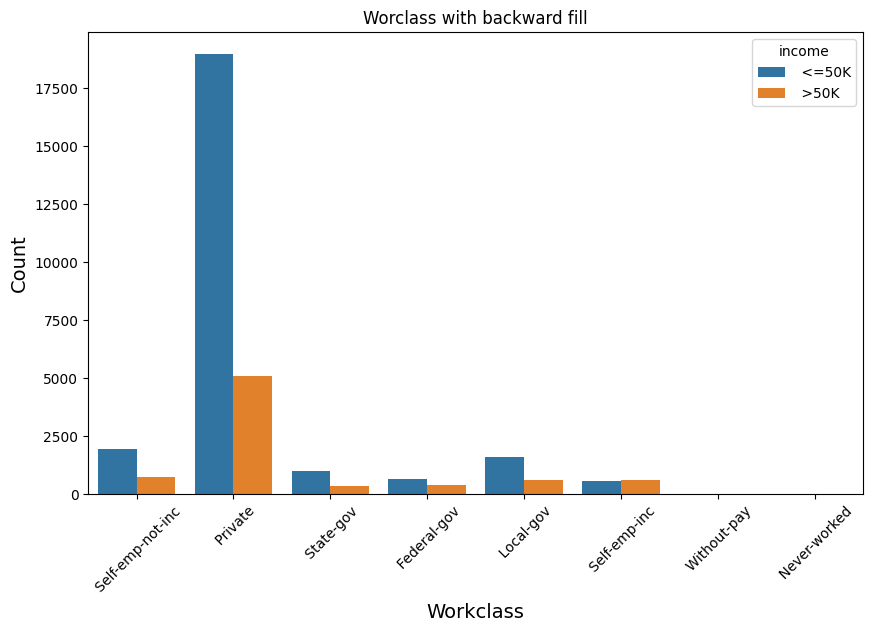

In [324]:
df_workspace_bfill = df[['workclass', 'income']]
df_workspace_bfill['workclass'].replace(' ?', np.NaN, inplace = True)
df_workspace_bfill['workclass'].fillna(method = 'bfill', inplace = True)
df_workspace_bfill['workclass'].value_counts()

plt.figure(figsize = (10, 6))
ax = sns.countplot(x = 'workclass', data = df_workspace_bfill, hue = 'income')
plt.xticks(rotation=45)
plt.title('Worclass with backward fill')
plt.ylabel('Count', fontsize = 14)
plt.xlabel('Workclass', fontsize = 14)

print('\n')
print('******************************************************************************************************************************************************************')
after_bfill_workclass = df_workspace_bfill['workclass'].value_counts().to_dict()

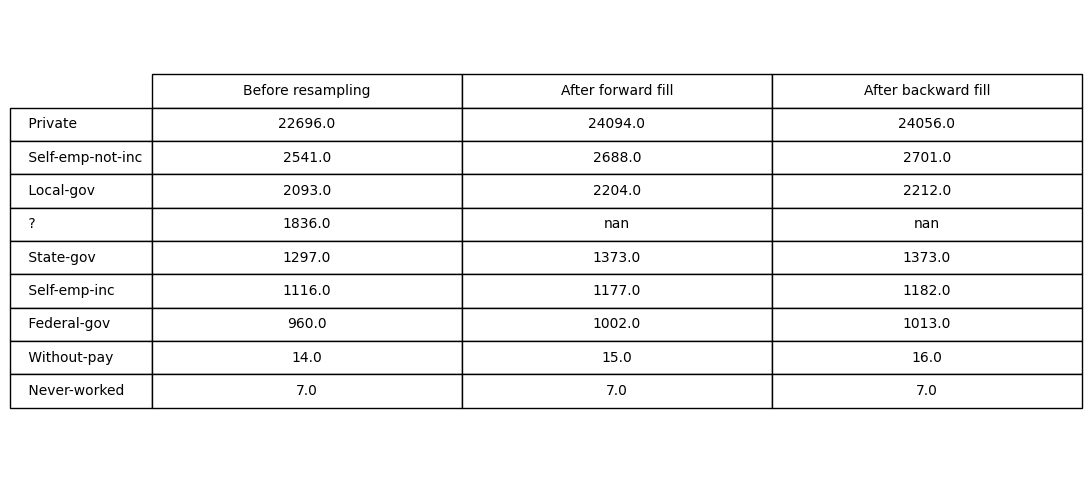

In [325]:
workclass_data_resampling = {
    'Before resampling': workclass_before_resampling,
    'After forward fill': after_ffill_workclass,
    'After backward fill': after_bfill_workclass
}

workclass_table = pd.DataFrame(workclass_data_resampling)

fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figsize as needed
ax.axis("off")
tbl = table(ax, workclass_table, loc="center", cellLoc="center", colWidths=[0.2] * len(workclass_table.columns))
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(2, 2)  # Adjust the scale as needed
plt.show()

### Occupation

In [326]:
print('\n')
print('******************************************************************************************************************************************************************')
occupation_before_resampling = df['Occupation'].value_counts().to_dict()
occupation_before_resampling



******************************************************************************************************************************************************************


{' Prof-specialty': 4140,
 ' Craft-repair': 4099,
 ' Exec-managerial': 4066,
 ' Adm-clerical': 3769,
 ' Sales': 3650,
 ' Other-service': 3295,
 ' Machine-op-inspct': 2002,
 ' ?': 1843,
 ' Transport-moving': 1597,
 ' Handlers-cleaners': 1370,
 ' Farming-fishing': 994,
 ' Tech-support': 928,
 ' Protective-serv': 649,
 ' Priv-house-serv': 149,
 ' Armed-Forces': 9}

<ipython-input-327-81ef09ff930c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Occupation_ffill['Occupation'].replace(' ?', np.NaN, inplace = True)
<ipython-input-327-81ef09ff930c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Occupation_ffill['Occupation'].fillna(method = 'ffill', inplace = True)




******************************************************************************************************************************************************************


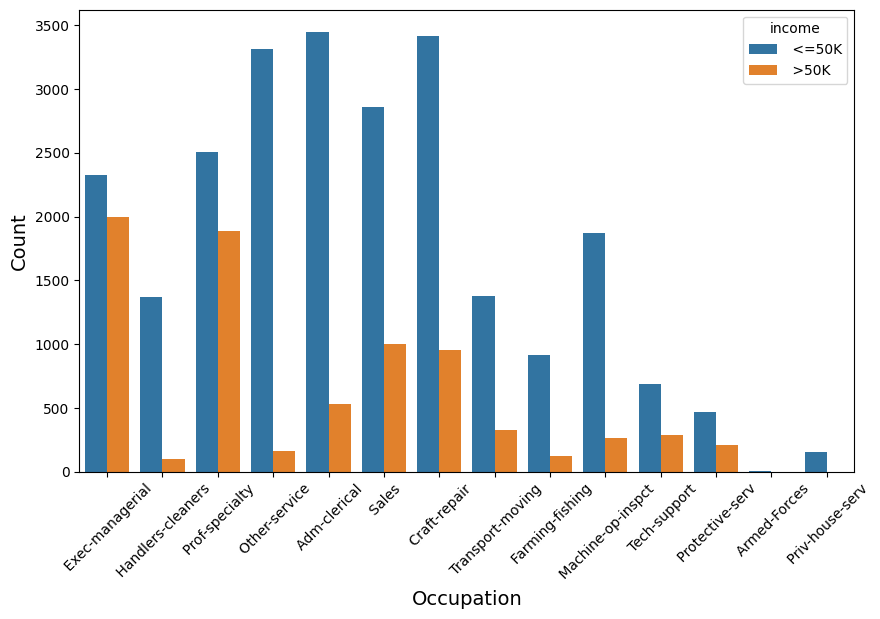

In [327]:
df_Occupation_ffill = df[['Occupation', 'income']]
df_Occupation_ffill['Occupation'].replace(' ?', np.NaN, inplace = True)
df_Occupation_ffill['Occupation'].fillna(method = 'ffill', inplace = True)
df_Occupation_ffill['Occupation'].value_counts()

plt.figure(figsize = (10, 6))
ax = sns.countplot(x = 'Occupation', data = df_Occupation_ffill, hue = 'income')
plt.xticks(rotation=45)
plt.ylabel('Count', fontsize = 14)
plt.xlabel('Occupation', fontsize = 14)

print('\n')
print('******************************************************************************************************************************************************************')
after_ffill_occupation = df_Occupation_ffill['Occupation'].value_counts().to_dict()

<ipython-input-328-6fe3d0c84922>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Occupation_bfill['Occupation'].replace(' ?', np.NaN, inplace = True)
<ipython-input-328-6fe3d0c84922>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Occupation_bfill['Occupation'].fillna(method = 'bfill', inplace = True)




******************************************************************************************************************************************************************


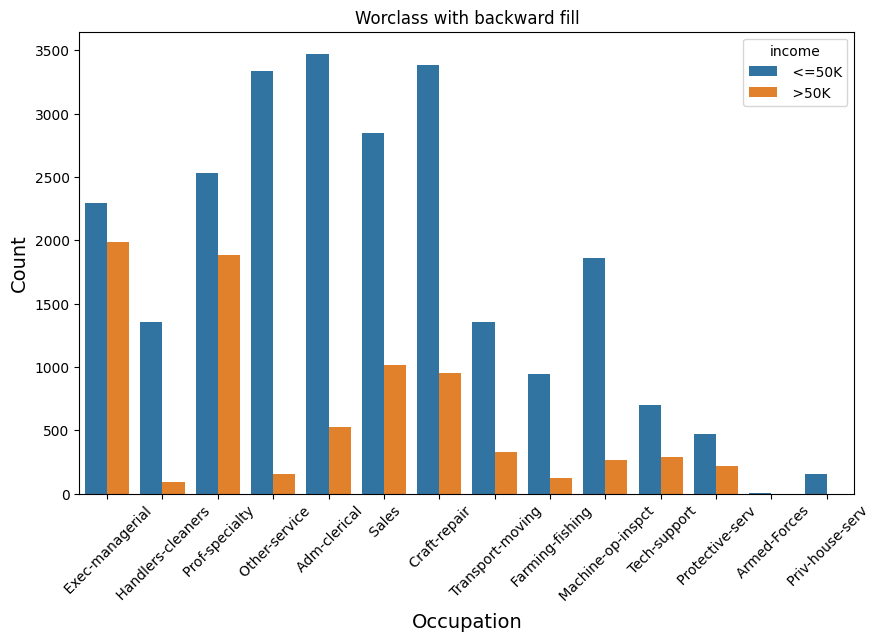

In [328]:
df_Occupation_bfill = df[['Occupation', 'income']]
df_Occupation_bfill['Occupation'].replace(' ?', np.NaN, inplace = True)
df_Occupation_bfill['Occupation'].fillna(method = 'bfill', inplace = True)
df_Occupation_bfill['Occupation'].value_counts()

plt.figure(figsize = (10, 6))
ax = sns.countplot(x = 'Occupation', data = df_Occupation_bfill, hue = 'income')
plt.xticks(rotation=45)
plt.title('Worclass with backward fill')
plt.ylabel('Count', fontsize = 14)
plt.xlabel('Occupation', fontsize = 14)

print('\n')
print('******************************************************************************************************************************************************************')
after_bfill_occupation = df_Occupation_bfill['Occupation'].value_counts().to_dict()

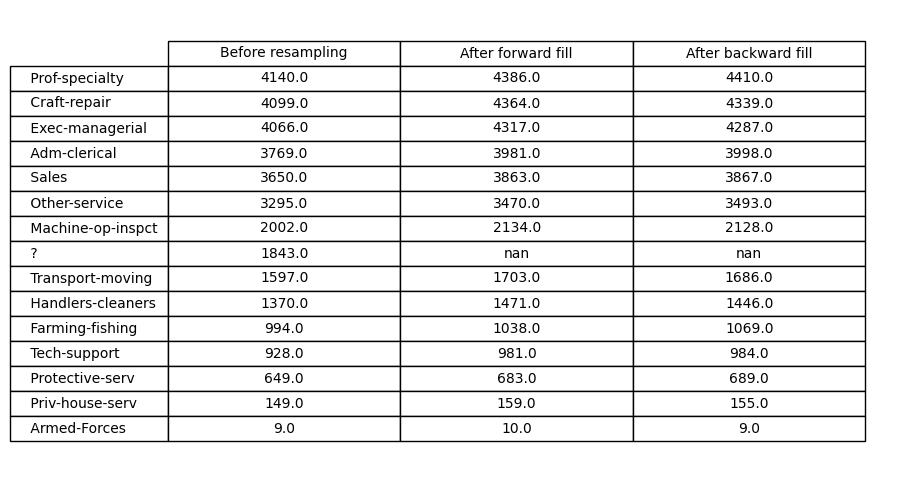

In [329]:
occupation_data_resampling = {
    'Before resampling': occupation_before_resampling,
    'After forward fill': after_ffill_occupation,
    'After backward fill': after_bfill_occupation
}

occupation_table = pd.DataFrame(occupation_data_resampling)

fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figsize as needed
ax.axis("off")
tbl = table(ax, occupation_table, loc="center", cellLoc="center", colWidths=[0.2] * len(occupation_table.columns))
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.5, 1.5)  # Adjust the scale as needed
plt.show()

### Native country

In [330]:
print('\n')
print('******************************************************************************************************************************************************************')
native_before_resampling = df['native-country'].value_counts().to_dict()
native_before_resampling



******************************************************************************************************************************************************************


{' United-States': 29169,
 ' Mexico': 643,
 ' ?': 583,
 ' Philippines': 198,
 ' Germany': 137,
 ' Canada': 121,
 ' Puerto-Rico': 114,
 ' El-Salvador': 106,
 ' India': 100,
 ' Cuba': 95,
 ' England': 90,
 ' Jamaica': 81,
 ' South': 80,
 ' China': 75,
 ' Italy': 73,
 ' Dominican-Republic': 70,
 ' Vietnam': 67,
 ' Guatemala': 64,
 ' Japan': 62,
 ' Poland': 60,
 ' Columbia': 59,
 ' Taiwan': 51,
 ' Haiti': 44,
 ' Iran': 43,
 ' Portugal': 37,
 ' Nicaragua': 34,
 ' Peru': 31,
 ' France': 29,
 ' Greece': 29,
 ' Ecuador': 28,
 ' Ireland': 24,
 ' Hong': 20,
 ' Cambodia': 19,
 ' Trinadad&Tobago': 19,
 ' Laos': 18,
 ' Thailand': 18,
 ' Yugoslavia': 16,
 ' Outlying-US(Guam-USVI-etc)': 14,
 ' Honduras': 13,
 ' Hungary': 13,
 ' Scotland': 12,
 ' Holand-Netherlands': 1}

<ipython-input-331-f5fc5931a7a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_native_country_ffill['native-country'].replace(' ?', np.NaN, inplace = True)
<ipython-input-331-f5fc5931a7a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_native_country_ffill['native-country'].fillna(method = 'ffill', inplace = True)




******************************************************************************************************************************************************************


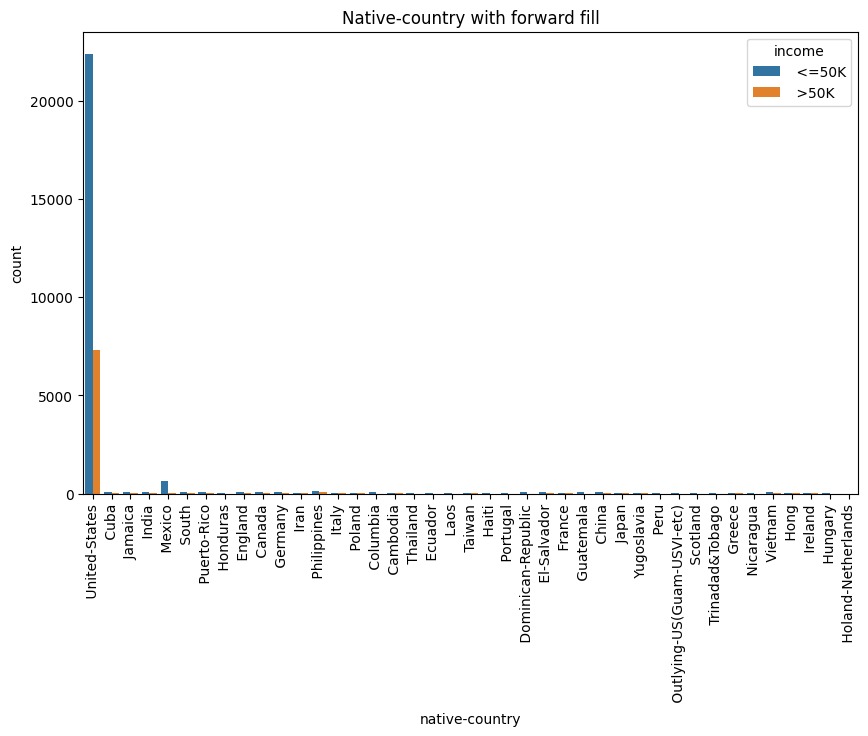

In [331]:
df_native_country_ffill = df[['native-country', 'income']]
df_native_country_ffill['native-country'].replace(' ?', np.NaN, inplace = True)
df_native_country_ffill['native-country'].fillna(method = 'ffill', inplace = True)
df_native_country_ffill['native-country'].value_counts()

plt.figure(figsize = (10, 6))
ax = sns.countplot(x = 'native-country', data = df_native_country_ffill, hue = 'income')
plt.xticks(rotation=90)
plt.title('Native-country with forward fill')

print('\n')
print('******************************************************************************************************************************************************************')
after_ffill_native = df_native_country_ffill['native-country'].value_counts().to_dict()

<ipython-input-332-00abfc8eca65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_native_country_bfill['native-country'].replace(' ?', np.NaN, inplace = True)
<ipython-input-332-00abfc8eca65>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_native_country_bfill['native-country'].fillna(method = 'bfill', inplace = True)




******************************************************************************************************************************************************************


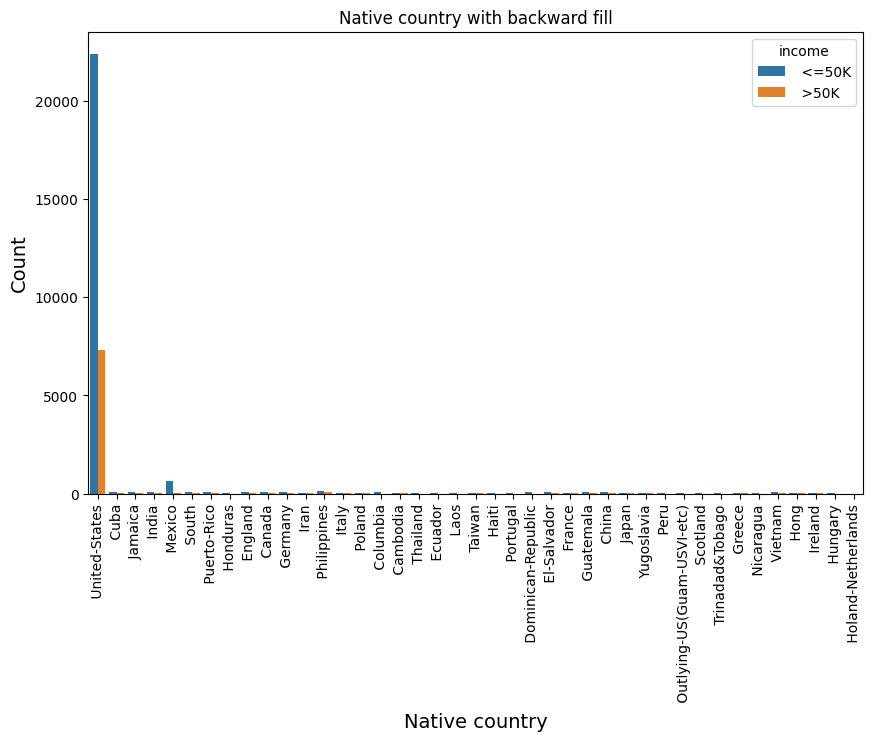

In [332]:
df_native_country_bfill = df[['native-country', 'income']]
df_native_country_bfill['native-country'].replace(' ?', np.NaN, inplace = True)
df_native_country_bfill['native-country'].fillna(method = 'bfill', inplace = True)
df_native_country_bfill['native-country'].value_counts()

plt.figure(figsize = (10, 6))
ax = sns.countplot(x = 'native-country', data = df_native_country_bfill, hue = 'income')
plt.xticks(rotation=90)
plt.title('Native country with backward fill')
plt.ylabel('Count', fontsize = 14)
plt.xlabel('Native country', fontsize = 14)

print('\n')
print('******************************************************************************************************************************************************************')
after_bfill_native = df_native_country_bfill['native-country'].value_counts().to_dict()

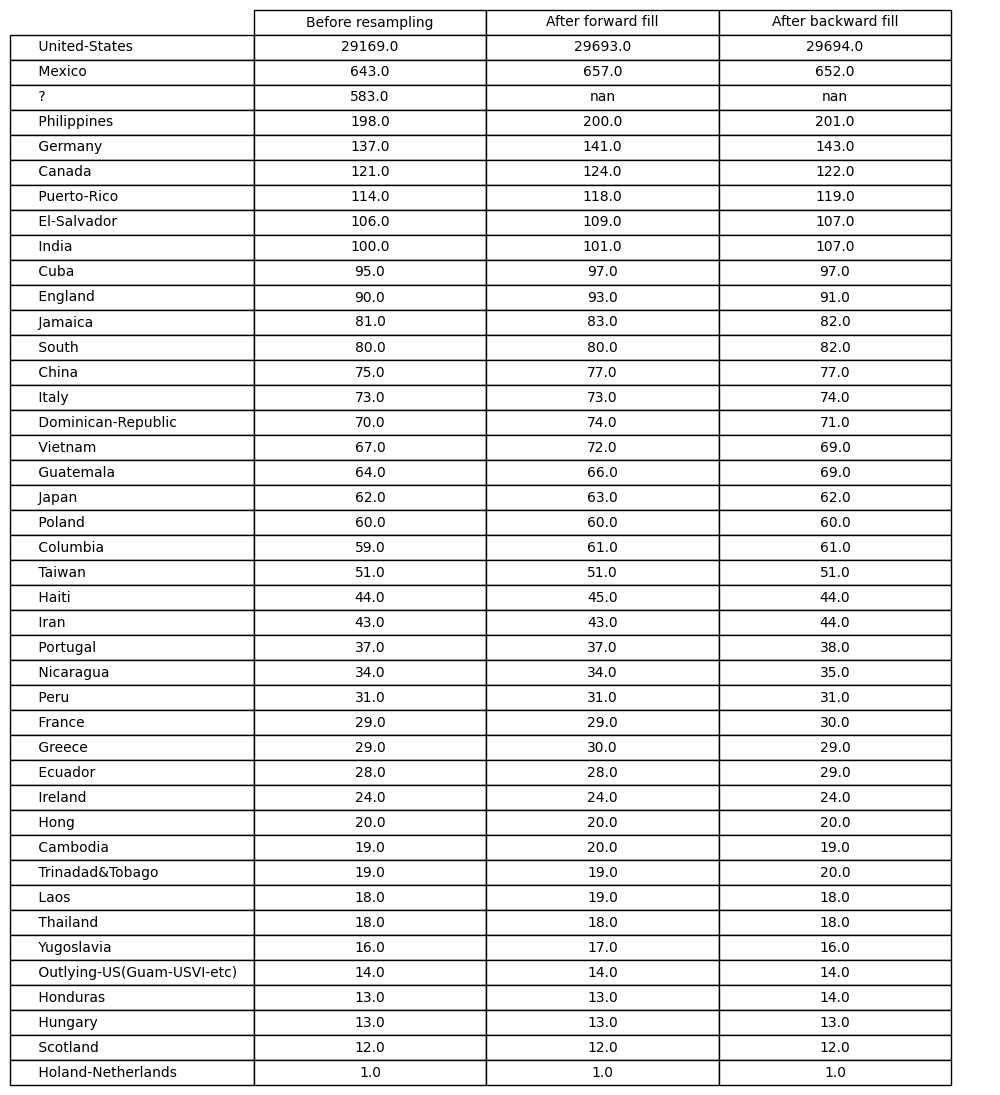

In [333]:
native_country_data_resampling = {
    'Before resampling': native_before_resampling,
    'After forward fill': after_ffill_native,
    'After backward fill': after_bfill_native
}

native_country_table = pd.DataFrame(native_country_data_resampling)

fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figsize as needed
ax.axis("off")
tbl = table(ax, native_country_table, loc="center", cellLoc="center", colWidths=[0.2] * len(native_country_table.columns))
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.5, 1.5)  # Adjust the scale as needed

plt.show()

Since there is no large variation with respect to forward fill resampling and backward fill resampling. Let's move ahead with forward fill resampling.

In [334]:
df['workclass'] = df_workspace_ffill['workclass']
df['Occupation'] = df_Occupation_ffill['Occupation']
df['native-country'] = df_native_country_ffill['native-country']

In [335]:
for cols in list(df.columns):
  if str(df[cols].dtypes) == 'object':
    print(df[cols].unique())

[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
[' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
[' Male' ' Female']
[' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Phil

## Exploratory Data Analysis

In [336]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'Occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

### Age vs Income

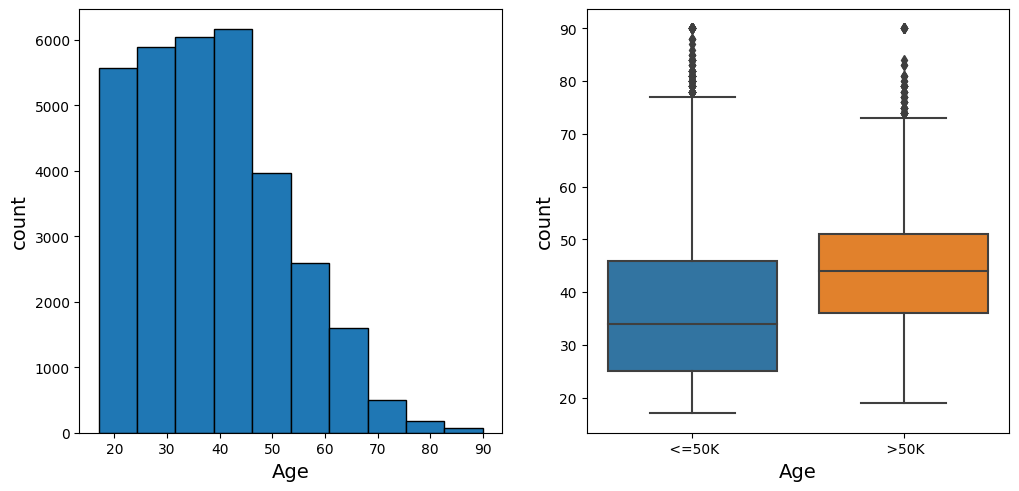

In [337]:
# Creating histograms and boxplot for numerical variables
f,ax=plt.subplots(1,2,figsize=(12,5.5))
ax[0].hist(df.age, edgecolor="black")
ax[0].set_xlabel('Age', fontsize = 14)
ax[0].set_ylabel('count', fontsize = 14)
sns.boxplot(x='income', y='age', data=df, ax=ax[1])
ax[1].set_xlabel('Age', fontsize = 14)
ax[1].set_ylabel('count', fontsize = 14)
plt.show()

### fnlwgt vs income

(2,)


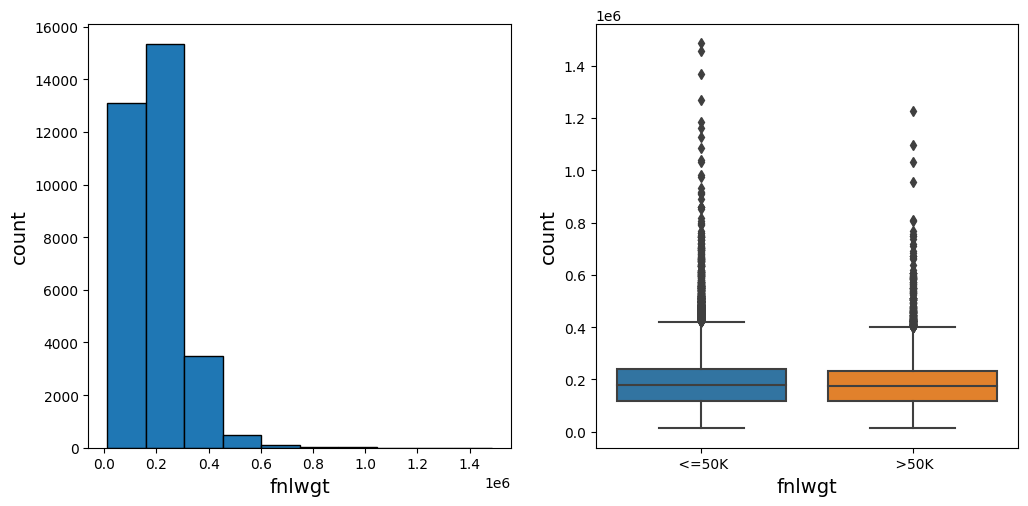

In [338]:
f,ax=plt.subplots(1,2,figsize=(12,5.5))
print(ax.shape)
ax[0].hist(df.fnlwgt, edgecolor="black")
ax[0].set_xlabel('fnlwgt', fontsize = 14)
ax[0].set_ylabel('count', fontsize = 14)
sns.boxplot(x='income', y='fnlwgt', data=df, ax=ax[1])
ax[1].set_xlabel('fnlwgt', fontsize = 14)
ax[1].set_ylabel('count', fontsize = 14)
plt.show()

### education num vs income

(2,)


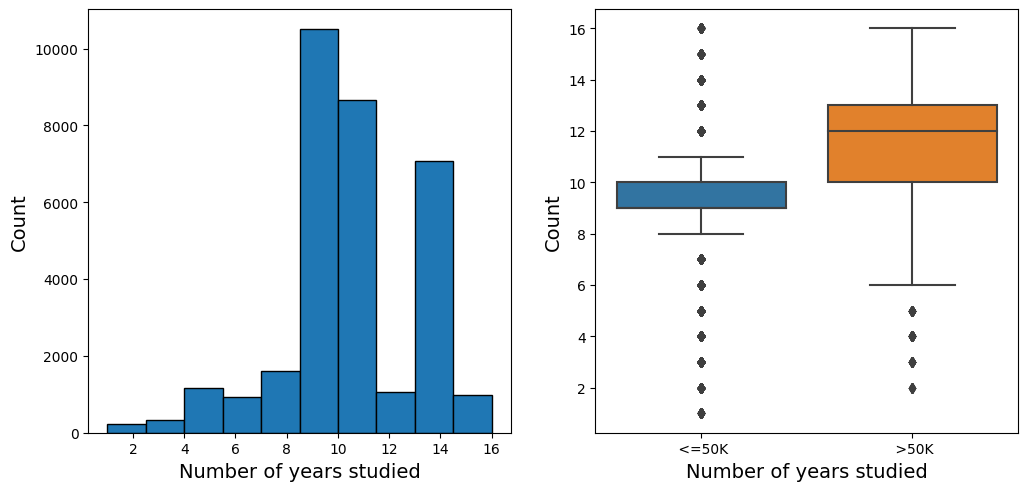

In [339]:
f,ax=plt.subplots(1,2,figsize=(12,5.5))
print(ax.shape)
ax[0].hist(df['education-num'], edgecolor="black")
ax[0].set_xlabel('Number of years studied', fontsize = 14)
ax[0].set_ylabel('Count', fontsize = 14)
sns.boxplot(x='income', y='education-num', data=df, ax=ax[1])
ax[1].set_xlabel('Number of years studied', fontsize = 14)
ax[1].set_ylabel('Count', fontsize = 14)
plt.show()

### education vs income

Text(0.5, 0, 'Education')

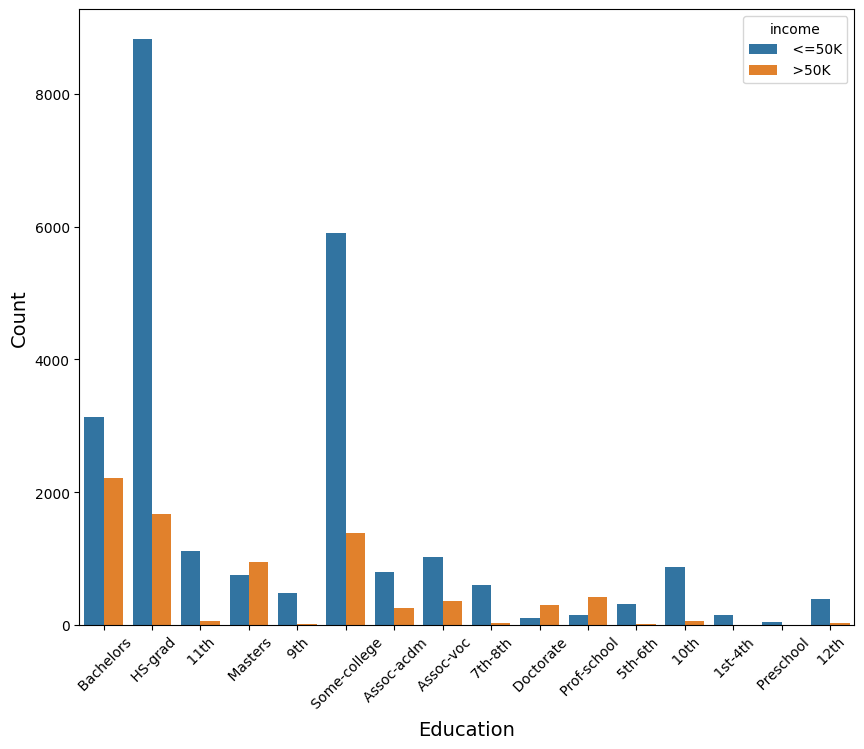

In [340]:
f,ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x='education',data=df,hue='income', ax = ax)
plt.xticks(rotation=45)
plt.ylabel('Count', fontsize = 14)
plt.xlabel('Education', fontsize = 14)

### marital status vs income

Text(0.5, 0, 'Marital Status')

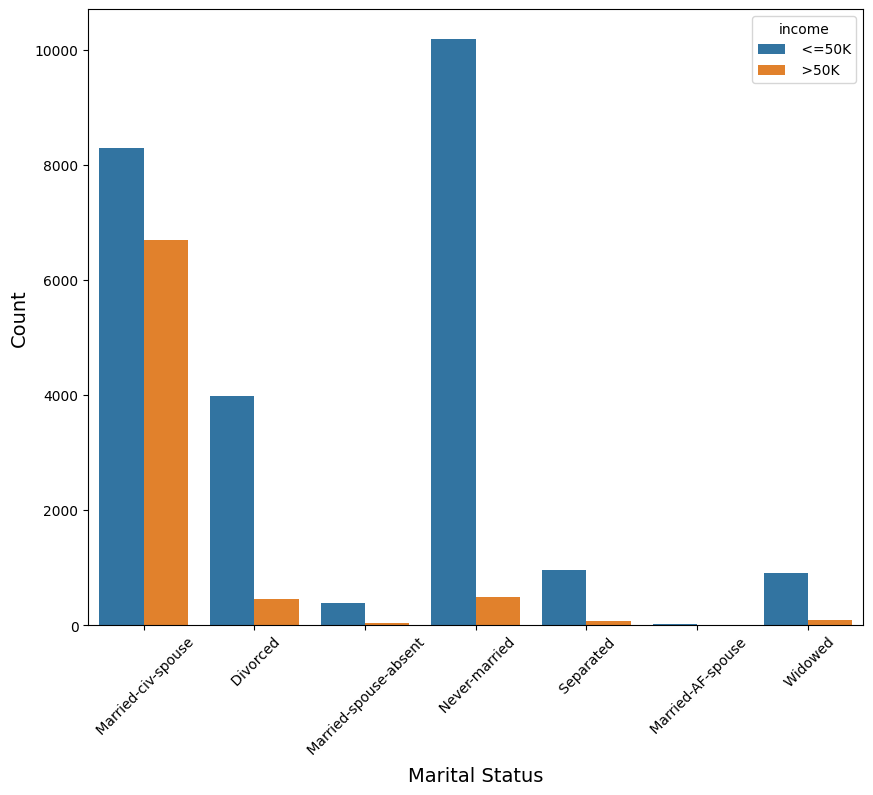

In [341]:
f,ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x='marital-status',data=df,hue='income', ax = ax)
plt.xticks(rotation=45)
plt.ylabel('Count', fontsize = 14)
plt.xlabel('Marital Status', fontsize = 14)

Text(0.5, 0, 'Realtionship Status')

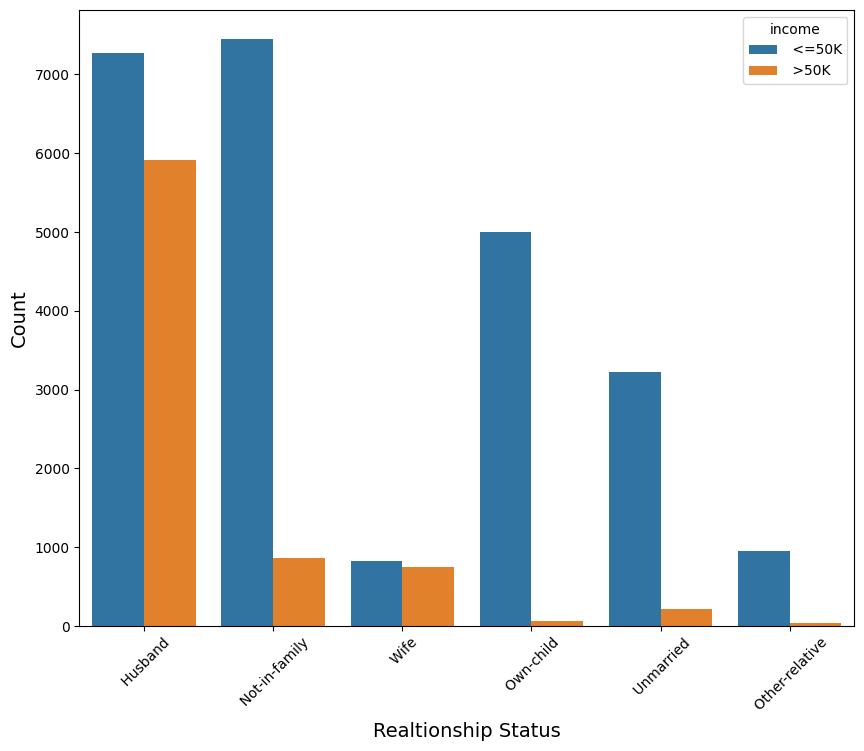

In [342]:
f,ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x='relationship',data=df,hue='income', ax = ax)
plt.xticks(rotation=45)
plt.ylabel('Count', fontsize = 14)
plt.xlabel('Realtionship Status', fontsize = 14)

Text(0.5, 0, 'Race')

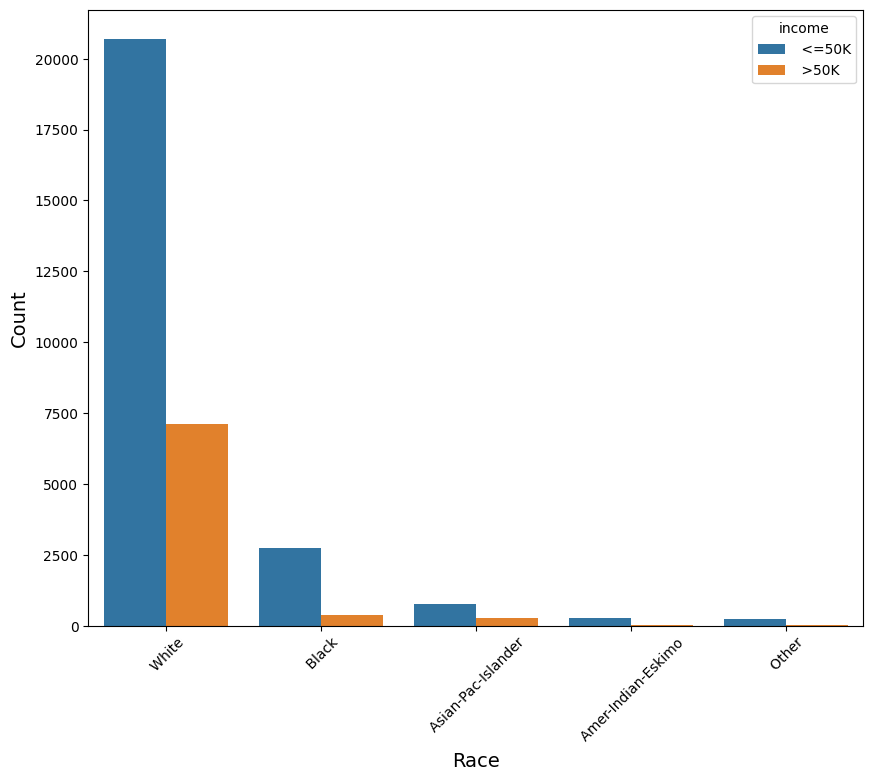

In [343]:
f,ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x='race',data=df,hue='income', ax = ax)
plt.xticks(rotation=45)
plt.ylabel('Count', fontsize = 14)
plt.xlabel('Race', fontsize = 14)

Text(0.5, 0, 'Sex')

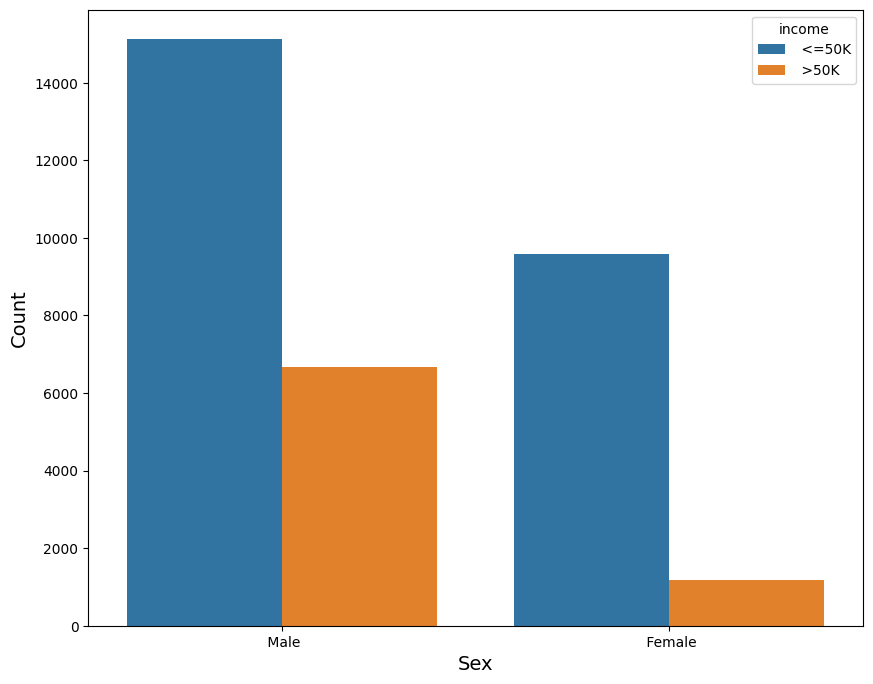

In [344]:
f,ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x='sex',data=df,hue='income', ax = ax)
plt.ylabel('Count', fontsize = 14)
plt.xlabel('Sex', fontsize = 14)

### Capital gain vs income

(2,)


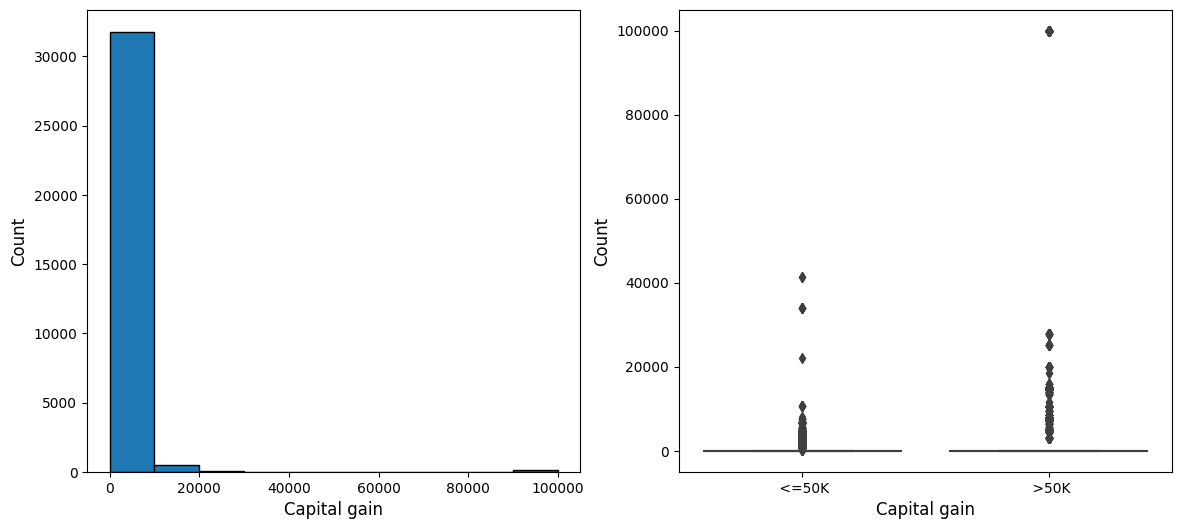

In [345]:
f,ax=plt.subplots(1,2,figsize=(14,6))
print(ax.shape)
ax[0].hist(df['capital-gain'], edgecolor="black")
ax[0].set_xlabel('Capital gain', fontsize = 12)
ax[0].set_ylabel('Count', fontsize = 12)
sns.boxplot(x='income', y='capital-gain', data=df, ax=ax[1])
ax[1].set_xlabel('Capital gain', fontsize = 12)
ax[1].set_ylabel('Count', fontsize = 12)
plt.show()

### Capital loss vs income

(2,)


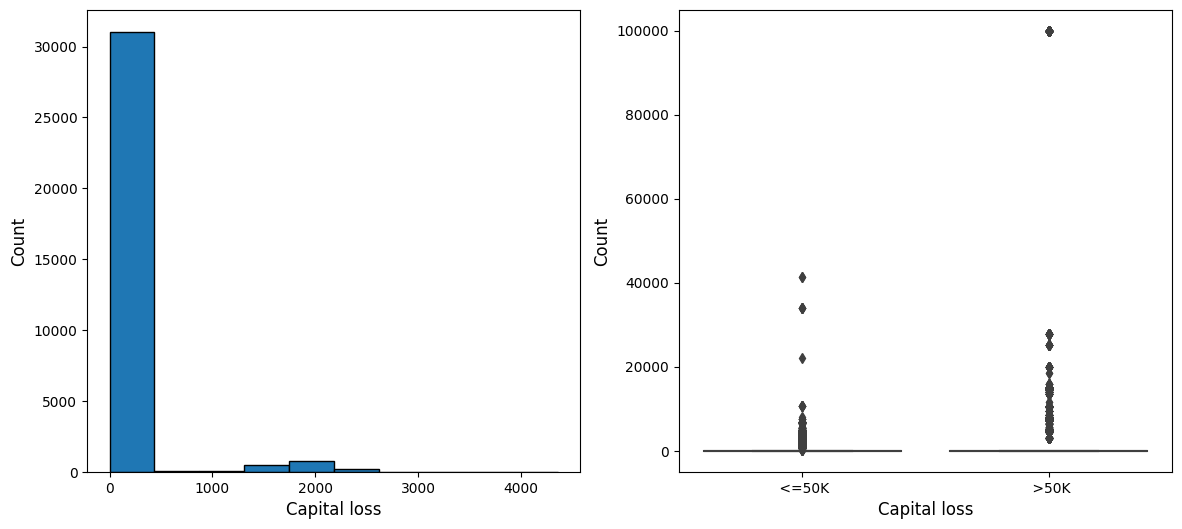

In [346]:
f,ax=plt.subplots(1,2,figsize=(14,6))
print(ax.shape)
ax[0].hist(df['capital-loss'], edgecolor="black")
ax[0].set_xlabel('Capital loss', fontsize = 12)
ax[0].set_ylabel('Count', fontsize = 12)
sns.boxplot(x='income', y='capital-gain', data=df, ax=ax[1])
ax[1].set_xlabel('Capital loss', fontsize = 12)
ax[1].set_ylabel('Count', fontsize = 12)
plt.show()

### hours per week vs income

(2,)


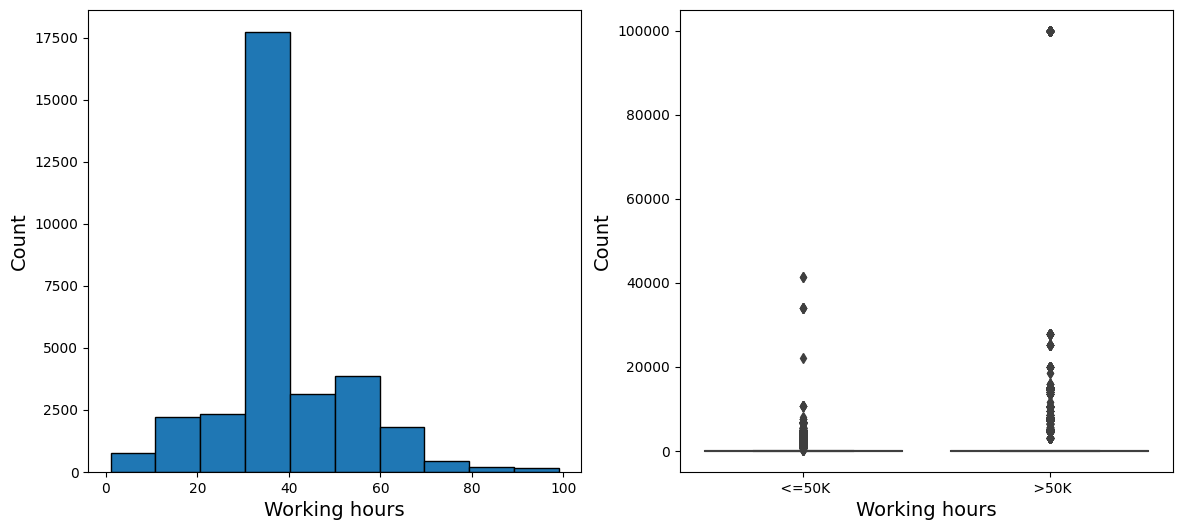

In [347]:
f,ax=plt.subplots(1,2,figsize=(14,6))
print(ax.shape)
ax[0].hist(df['hours-per-week'], edgecolor="black")
ax[0].set_xlabel('Working hours', fontsize = 14)
ax[0].set_ylabel('Count', fontsize = 14)
sns.boxplot(x='income', y='capital-gain', data=df, ax=ax[1])
ax[1].set_xlabel('Working hours', fontsize = 14)
ax[1].set_ylabel('Count', fontsize = 14)
plt.show()

## Feature Generation

Created a new variable grouping according to education numbers ar high, med or low.


In [348]:
def bin_var(data, var, bins, group_names):
    bin_value = bins
    group = group_names
    data[var+'Cat'] = pd.cut(df[var], bin_value, labels=group)

bin_var(df, 'education-num', [0,6,11,16], ['Low', 'Medium', 'High'])

In [349]:
bin_var(df, 'hours-per-week', [0,35,40,60,100], ['Low', 'Medium', 'High','VeryHigh'])

Classifying the occupation into Highly Skilled and low Skilled

In [350]:
occu=pd.crosstab(df['Occupation'],df['income'], margins=True).reset_index()
occu

income,Occupation,<=50K,>50K,All
0,Adm-clerical,3448,533,3981
1,Armed-Forces,9,1,10
2,Craft-repair,3412,952,4364
3,Exec-managerial,2323,1994,4317
4,Farming-fishing,915,123,1038
5,Handlers-cleaners,1373,98,1471
6,Machine-op-inspct,1871,263,2134
7,Other-service,3311,159,3470
8,Priv-house-serv,158,1,159
9,Prof-specialty,2502,1884,4386


In [351]:
#creating a function to categorize skill
import re
def occup(x):
    if re.search('managerial', x):
        return 'Highskill'
    elif re.search('specialty',x):
        return 'Highskill'
    else:
        return 'Lowskill'

In [352]:
# Creating the occupation category feature
df['Occupa_cat']=df.Occupation.apply(lambda x: x.strip()).apply(lambda x: occup(x))
df['Occupa_cat'].value_counts()

Lowskill     23857
Highskill     8703
Name: Occupa_cat, dtype: int64

In [353]:
pd.crosstab(df['race'],df['income'], margins=True)

income,<=50K,>50K,All
race,,,
Amer-Indian-Eskimo,275,36,311
Asian-Pac-Islander,763,276,1039
Black,2737,387,3124
Other,246,25,271
White,20698,7117,27815
All,24719,7841,32560


In [354]:
# Creating race category feature
df['Race_cat']=df['race'].apply(lambda x: x.strip())
df['Race_cat']=df['Race_cat'].apply(lambda x: 'White' if x=='White' else 'Other')

## Encoding the categorical variables

In [355]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']
print(categorical)

['workclass', 'education', 'marital-status', 'Occupation', 'relationship', 'race', 'sex', 'native-country', 'income', 'Occupa_cat', 'Race_cat']


In [356]:
# Find numerical variables

numerical = [var for var in df.columns if df[var].dtype !='O']
print(numerical)

['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'education-numCat', 'hours-per-weekCat']


In [357]:
categorical

['workclass',
 'education',
 'marital-status',
 'Occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income',
 'Occupa_cat',
 'Race_cat']

In [358]:
# import category encoders
# encode remaining variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['workclass',
 'education',
 'marital-status',
 'Occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'Occupa_cat',
 'Race_cat', 'education-numCat', "hours-per-weekCat"])

df = encoder.fit_transform(df)

## Feature Selection Using Variance Threshold

Variance Threshold is a univariate approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples. As an example, suppose that we have a dataset with boolean features, and we want to remove all features that are either one or zero (on or off) in more than 80% of the samples. Boolean features are Bernoulli random variables, and the variance of such variables is given by The below approach removes variable which have more than 80% values are either 0 or 1.

In [359]:
for items in list(df.columns):
  print(items)

age
workclass_1
workclass_2
workclass_3
workclass_4
workclass_5
workclass_6
workclass_7
workclass_8
fnlwgt
education_1
education_2
education_3
education_4
education_5
education_6
education_7
education_8
education_9
education_10
education_11
education_12
education_13
education_14
education_15
education_16
education-num
marital-status_1
marital-status_2
marital-status_3
marital-status_4
marital-status_5
marital-status_6
marital-status_7
Occupation_1
Occupation_2
Occupation_3
Occupation_4
Occupation_5
Occupation_6
Occupation_7
Occupation_8
Occupation_9
Occupation_10
Occupation_11
Occupation_12
Occupation_13
Occupation_14
relationship_1
relationship_2
relationship_3
relationship_4
relationship_5
relationship_6
race_1
race_2
race_3
race_4
race_5
sex_1
sex_2
capital-gain
capital-loss
hours-per-week
native-country_1
native-country_2
native-country_3
native-country_4
native-country_5
native-country_6
native-country_7
native-country_8
native-country_9
native-country_10
native-country_11
native-

In [360]:
def variance_threshold_select(df, thresh=0.0, na_replacement=-999):
    df1 = df.copy(deep=True) # Make a deep copy of the dataframe
    selector = VarianceThreshold(thresh) # passing Threshold
    selector.fit(df1) # Fill NA values as VarianceThreshold cannot deal with those
    df2 = df.loc[:,selector.get_support(indices=False)] # Get new dataframe with columns deleted that have NA values
    return df2

In [361]:
# Setting a 80 percent threshold
df2=variance_threshold_select(df.drop('income', axis=1), thresh=.8* (1 - .8))

In [362]:
for items in list(df2.columns):
  print(items)

age
workclass_2
fnlwgt
education_2
education_6
education-num
marital-status_1
marital-status_4
relationship_1
relationship_2
sex_1
sex_2
capital-gain
capital-loss
hours-per-week
education-numCat_2
education-numCat_3
hours-per-weekCat_1
hours-per-weekCat_2
hours-per-weekCat_3
Occupa_cat_1
Occupa_cat_2


## Modelling the Naive Bayes Classifier

In [363]:
model = GaussianNB()

In [364]:
# Splitting data into test train, using a 0.3 split
X = df2
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [365]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((22792, 22), (9768, 22))

In [366]:
# Scaling the training and test feature values

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [367]:
# Using Random Search method to find the best hyperparameters
from sklearn.model_selection import RandomizedSearchCV
gnb = GaussianNB()
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
CV_rfc = RandomizedSearchCV(estimator=gnb, param_distributions=param_grid, cv= 5,random_state=1)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'var_smoothing': 3.5111917342151273e-09}


In [368]:
#Defining the model with tuned hyperparameters
model = GaussianNB(var_smoothing=CV_rfc.best_params_['var_smoothing'])
# Fitting the model on to the train set
model.fit(X_train,y_train)

GaussianNB(var_smoothing=3.5111917342151273e-09)

In [369]:
predict_train = model.predict(X_train)

# Accuracy Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

predict_test = model.predict(X_test)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on train dataset :  0.8326605826605826
accuracy_score on test dataset :  0.8311834561834562


We see that the accuracy values for test and train are close, and thus no overfitting!

### Confusion Matrix

[[6852  543]
 [1106 1267]]


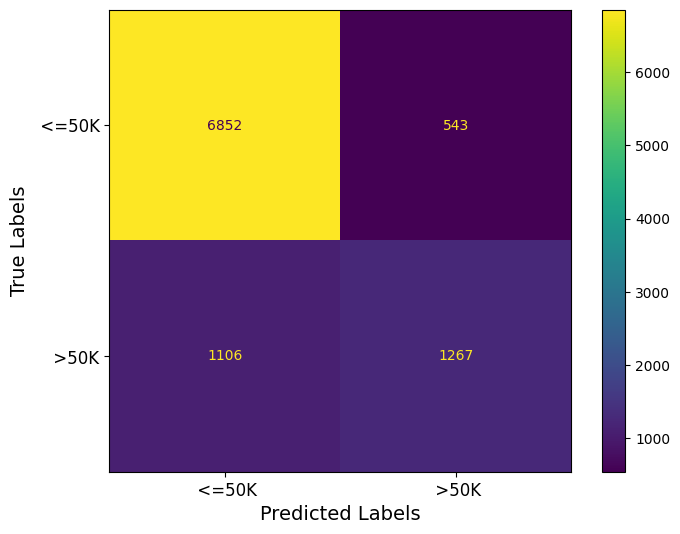

In [382]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Create the ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the figure size as needed
cmd.plot(ax=ax)

ax.set_xlabel('Predicted Labels', fontsize=14)
ax.set_ylabel('True Labels', fontsize=14)
ax.tick_params(axis='both', which='both', labelsize=12)

plt.show()

In [383]:
print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


True Positives(TP) =  6852

True Negatives(TN) =  1267

False Positives(FP) =  543

False Negatives(FN) =  1106


In [384]:
#Prinitng the classification report using the sklearn metrics library
from sklearn.metrics import classification_report

print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

       <=50K       0.86      0.93      0.89      7395
        >50K       0.70      0.53      0.61      2373

    accuracy                           0.83      9768
   macro avg       0.78      0.73      0.75      9768
weighted avg       0.82      0.83      0.82      9768



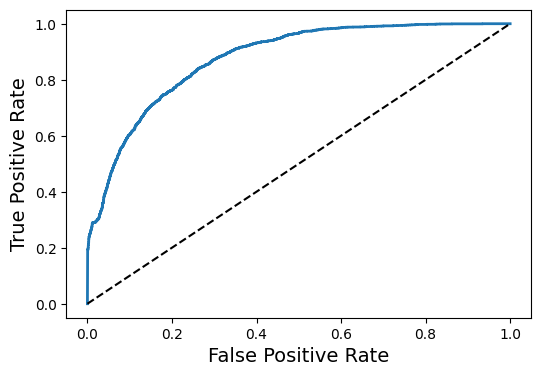

In [386]:
#Getting predicted probabilities
pred_proba = model.predict_proba(X_test)[:, 1]
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, pred_proba, pos_label = ' >50K')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.xlabel('False Positive Rate', fontsize = 14)

plt.ylabel('True Positive Rate', fontsize = 14)

plt.show()

In [387]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, pred_proba)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8756


As our ROC AUC value is close to 1, we can say that our classifer model is working well !

### k-Fold Cross Validation

In [388]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

print('Cross-validation mean accuracy:{}'.format(scores.mean()))

Cross-validation scores:[0.83640351 0.82719298 0.83808688 0.825362   0.8372093  0.8332602
 0.81878017 0.83984204 0.825362   0.84379114]
Cross-validation mean accuracy:0.8325290216546193


We see that the mean accuracy is close to the original one, and also there is not much deviation from the average for all the folds, thus we can say our model is not much reliant on the data on which it is being trained.

## Correlation Check

In [ ]:
# def cat_to_num(col_data, col_name, class_lis ):
#   col_data[col_name] = col_data[col_name].apply(lambda x: class_lis.index(x) + 1)

In [ ]:
# for cols in list(df.columns):
#   if str(df[cols].dtypes) == 'object':
#     cat_to_num(df, cols, list(df[cols].unique()))

In [ ]:
# df.info()

In [ ]:
# plt.figure(figsize=(16, 8))
# corr_matrix = df.corr()

# # Set the desired number of decimal places for the annotations
# decimal_places = 2  # Change this to your desired number of decimal places

# # Format the annotations with the desired number of decimal places
# ax = sns.heatmap(corr_matrix, annot=True, xticklabels=True, yticklabels=True,
#             annot_kws={"size": 10}, fmt=f'.{decimal_places}f')
# ax.tick_params(axis='both', which='both', labelsize = 14)

# plt.show()